## Credit Card Fraud Detection






## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

# Loading the Dataset


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/ML_Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Dataset is loaded and stored under 'data'

* With data.head() first five rows are viewed

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* There are 284807 Rows and 31 Columns present in the dataset
* Column Class which is of int64 datatype is our target and rest others are features which is of float 64

**Checking for Null Values**

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset has no Null values

**Getting the Statistics of our data**

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* **count**: counts the entries in a column
* **mean**: it is the **average of the particular column.**
* **std**: it **describes how the values are spread out around the mean**. Mathematically it is the square root of variarnce, where variance is sum of squared difference between value and mean. **Greater the standard deviation means data points are more spread out**(it means every data point values differ more from each othe) and **lesser the standard deviation data points are closer to each other.**
* **max** **and** **min**: these shows maximum and minimum values in a column
* **quartiles**(25%, 50%, 75%): the values here represents, **that there are(25% or 50% or 75%) data points which are lesser than mentioned value in particular column**.


As the **Class** has two distinct values 0 and 1, where **0** means it is actual transaction and **1** means its a fraud transaction.

So finding how many values of actual and real transactions gives better picture

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

By this we get that there are **284315** actual transactions and **492** farud transactions. Data is quite unblanced because actual transactions are higher than fraud and this might affect the model.

Due to unbalnce in actual and fraud values, create sample dataset where there is similar distrubution in actual and fraud values.

<Axes: xlabel='Class', ylabel='count'>

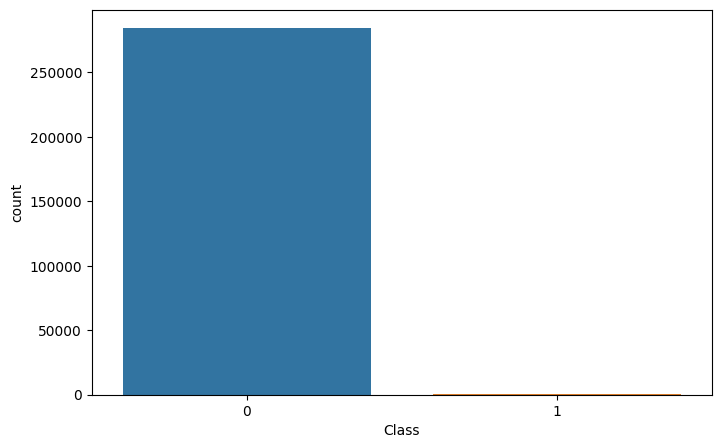

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='Class', data=data)

<Axes: xlabel='Class', ylabel='Amount'>

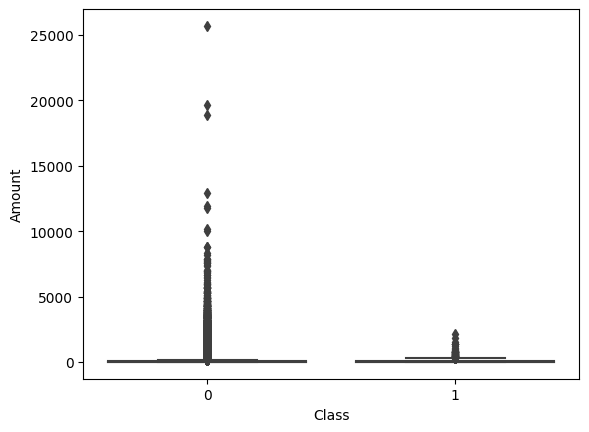

In [ ]:
sns.boxplot(x='Class', y='Amount', data=data)

## Splitting the Dataset

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


**X** contains only the fetaures of the data

Y contains only the target or labels of the dataset

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.8,random_state=42)
print(len(Xtrain))
print(len(Ytrain))

227845
227845


* **Xtrain**: This is a training set which contains 80% of the features.

* **Xtest**: This is a test set containing 20% of the features.
* **Ytrain**: This contains the labels for the Xtrain which is 80% of the labels
* **Ytest**: This contains the labels for the Xtest which is 20% of the labels


**Feature Scaling**

Here Standardisation can be used because dataset is highly imbanced wnd proe to outliers, for such condition standardisation is helpful.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fitimg the scaler on the training data and transforming it
Xtrains = scaler.fit_transform(Xtrain)

#Transforming the test data using the same scaler
Xtests = scaler.transform(Xtest)

## **Model Fitting**

### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrains,Ytrain)

LogisticRegression()

By using logistic regression model is trained on train set which is Xtrain containing 80% of data and Ytrain consits of labels related to Xtrain.

**Prediction on Test set**:

In [ ]:
test_pred_y = lr.predict(Xtests)

 **Evaluation of test set**:

In [ ]:
print(f'accuracy: {accuracy_score(Ytest,test_pred_y)}')
print(f'Recall Score: {recall_score(Ytest,test_pred_y)}')
print(f'Precision Score: {precision_score(Ytest,test_pred_y)}')
print(f'f1_score: {f1_score(Ytest,test_pred_y)}')

accuracy: 0.9991222218320986
Recall Score: 0.5816326530612245
Precision Score: 0.8636363636363636
f1_score: 0.6951219512195121


NOTE:
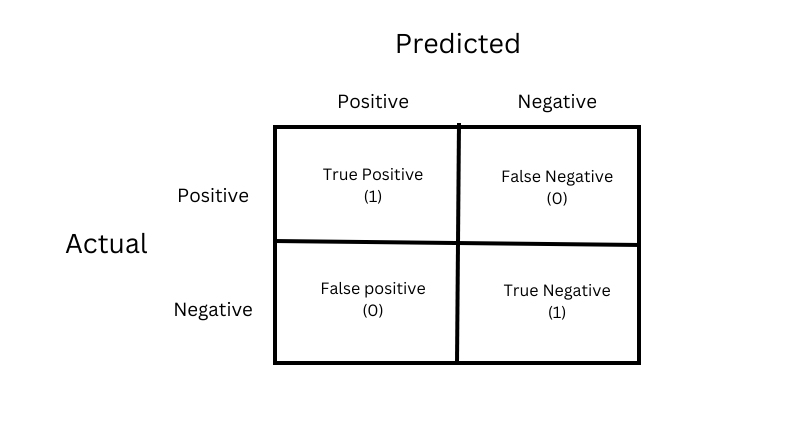

* In this case dataset is highly imbalanced which means that accuracy wont't help in evaluating the performance of the model. This is because accuracy gives how how model performed in predicting the values.

* Precision ability of the model to predict the correct values from the positive predictions.

  (True Positives)/(True Positives+False Positives)

* Recall ability of the model to predict all the correct values.

  (True Positives/True Positives+False Negatives)

**In this fraud detection case, false positives should be eliminated as much as possible. Because False Positives means model has predicted a value to be true but in reality it is false. If my transactions are fraud but model is saying that it is actual/normal transactions then there would be big problem.**

Hence in this case Recall is considered.

In [ ]:
print(classification_report(Ytest, test_pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Recall for Actual transaction is high(1) indicating that model is able to predict the actual transaction but for Fraud transaction Recall is quite low(0.58) indicating that model's performance for Fraud detection is low.

On the other hand Precision for Actual transaction is high(1) indicating that correcct predictions made by the model. For Fraud transaction it is 86%

In [ ]:
score=recall_score(Ytest, test_pred_y)
matr=confusion_matrix(Ytest, test_pred_y)
print(matr)
score

[[56855     9]
 [   41    57]]


0.5816326530612245

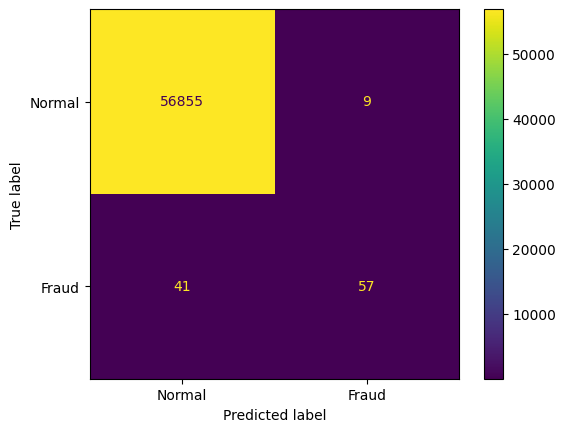

In [ ]:
label=['Normal','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()


Imbalance of the data can be solved using various methods. In this case **Synthetic Minority Oversampling Technique** is used.

Oversampling is adding extra values for the miniority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
Xtrains_re, Ytrain_re = smote.fit_resample(Xtrains, Ytrain)


In [ ]:
Xtests_re, Ytest_re = smote.fit_resample(Xtests,Ytest)

In [ ]:
#using l2 regularisation:
l2 = LogisticRegression(penalty='l2', random_state=42)
l2.fit(Xtrains_re, Ytrain_re)
#Evaluate on test data:
test_ypred_lr = lr.predict(Xtests_re)
print(classification_report(Ytest_re, test_ypred_lr))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     56864
           1       1.00      0.57      0.73     56864

    accuracy                           0.79    113728
   macro avg       0.85      0.79      0.78    113728
weighted avg       0.85      0.79      0.78    113728



[[56855     9]
 [24314 32550]]


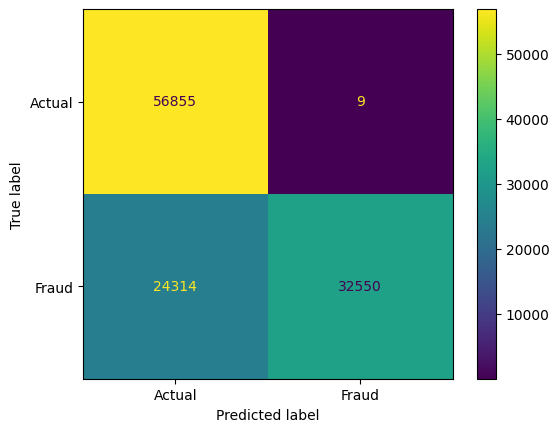

In [ ]:
score=recall_score(Ytest_re,test_ypred_lr)
matr=confusion_matrix(Ytest_re,test_ypred_lr)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()

### **2. Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
svc= SVC(C=2.0,kernel='rbf',random_state=42)
svc.fit(Xtrains_re,Ytrain_re)

SVC(C=2.0, random_state=42)

In [ ]:
svc_ytpred = svc.predict(Xtests_re)
print(f'accuracy: {accuracy_score(Ytest_re,svc_ytpred)}')
print(f'Recall: {recall_score(Ytest_re,svc_ytpred)}')
print(f'Precision: {precision_score(Ytest_re,svc_ytpred)}')

accuracy: 0.9549275464265616
Recall: 0.9241699493528419
Precision: 0.9847468425589326
F1 Score: 0.9534972330581512


[[56050   814]
 [ 4312 52552]]


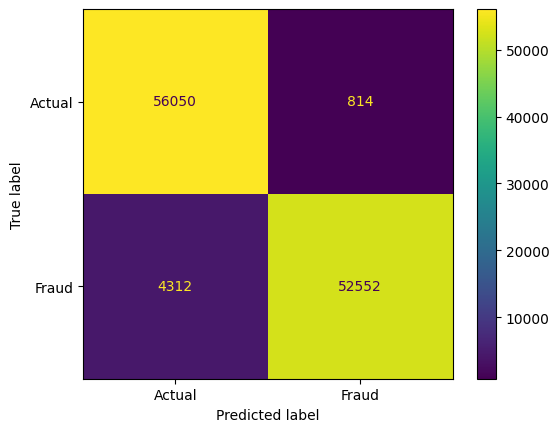

In [ ]:
score=recall_score(Ytest_re,svc_ytpred)
matr=confusion_matrix(Ytest_re,svc_ytpred)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()


### **2. Decission Trees:**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrains_re,Ytrain_re)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_test_ypred = dt.predict(Xtests_re)
print(f'accuracy: {accuracy_score(Ytest_re,dt_test_ypred)}')
print(f'Recall Score: {recall_score(Ytest_re,dt_test_ypred)}')
print(f'Precision Score: {precision_score(Ytest_re,dt_test_ypred)}')
print(f'f1_score: {f1_score(Ytest_re,dt_test_ypred)}')

accuracy: 0.9073051491277434
Recall Score: 0.8165974957794034
Precision Score: 0.9975723983844633
f1_score: 0.8980582524271845


By changing the parameters of Decision tree

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=12,random_state=42)
#dt2 = DecisionTreeClassifier(max_leaf_nodes=25,random_state=42)
dt2.fit(Xtrains_re,Ytrain_re)
print(f'Model score on train set: {dt2.score(Xtrains_re,Ytrain_re)}')

Model score on train set: 0.9939789229328515


In [ ]:
dt2_test_ypred = dt2.predict(Xtests_re)

In [ ]:
print(f'accuracy: {accuracy_score(Ytest_re,dt2_test_ypred)}')
print(f'Recall Score: {recall_score(Ytest_re,dt2_test_ypred)}')
print(f'Precision Score: {precision_score(Ytest_re,dt2_test_ypred)}')
print(f'f1_score: {f1_score(Ytest_re,dt2_test_ypred)}')

accuracy: 0.9272914321890827
Recall Score: 0.8636747326955543
Precision Score: 0.9895827036611659
f1_score: 0.9223517038678598


[[56347   517]
 [ 7752 49112]]


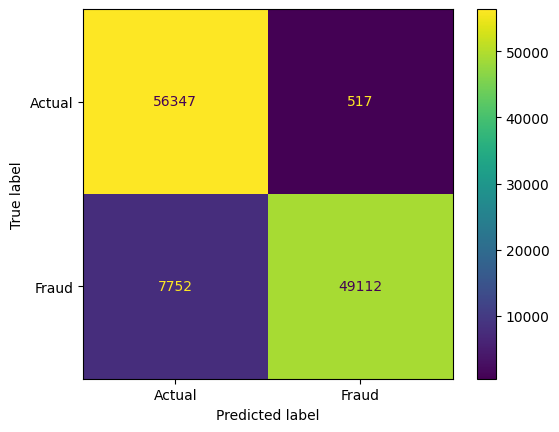

In [ ]:
score=recall_score(Ytest_re,dt2_test_ypred)
matr=confusion_matrix(Ytest_re,dt2_test_ypred)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()


### **3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)
rf.fit(Xtrains_re,Ytrain_re)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [ ]:
rf_typred = rf.predict(Xtests_re) #prediction on test set

print(f'accuracy: {accuracy_score(Ytest_re,rf_typred)}')
print(f'recall: {recall_score(Ytest_re,rf_typred)}')
print(f'precision: {precision_score(Ytest_re,rf_typred)}')

accuracy: 0.9485878587507034
recall: 0.9064258581879572
precision: 0.9898980199350861


[[56338   526]
 [ 5321 51543]]


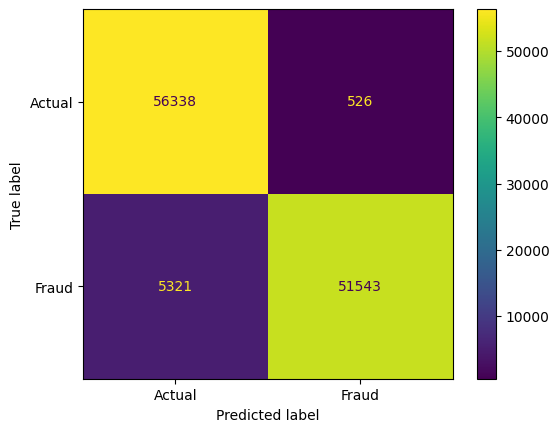

In [ ]:
score=recall_score(Ytest_re,rf_typred)
matr=confusion_matrix(Ytest_re,rf_typred)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()

### **4. Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrains_re,Ytrain_re)

GaussianNB()

In [ ]:
nb_ytpred = nb.predict(Xtests_re)
print(f'accuracy: {accuracy_score(Ytest_re,nb_ytpred)}')
print(f'recall: {recall_score(Ytest_re,nb_ytpred)}')
print(f'precision: {precision_score(Ytest_re,nb_ytpred)}')

accuracy:  0.918006119864941
recall:  0.8594189645469893
precision:  0.973486583932591


[[55533  1331]
 [ 7994 48870]]


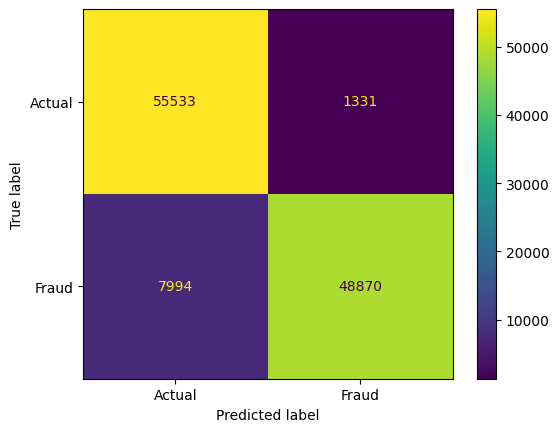

In [ ]:
score=recall_score(Ytest_re,nb_ytpred)
matr=confusion_matrix(Ytest_re,nb_ytpred)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()

### **5. XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=577)
xgb.fit(Xtrains_re, Ytrain_re)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_typred = xgb.predict(Xtests_re)

print(f'XGBoost - Test Accuracy: {accuracy_score(Ytest_re, xgb_typred )}')
print(f'XGBoost - Test Recall Score: {recall_score(Ytest_re, xgb_typred )}')
print(f'XGBoost - Test Precision Score: {precision_score(Ytest_re, xgb_typred)}')

XGBoost - Test Accuracy: 0.956299240292628
XGBoost - Test Recall Score: 0.9137063871693866
XGBoost - Test Precision Score: 0.9987889273356402


[[56801    63]
 [ 4907 51957]]


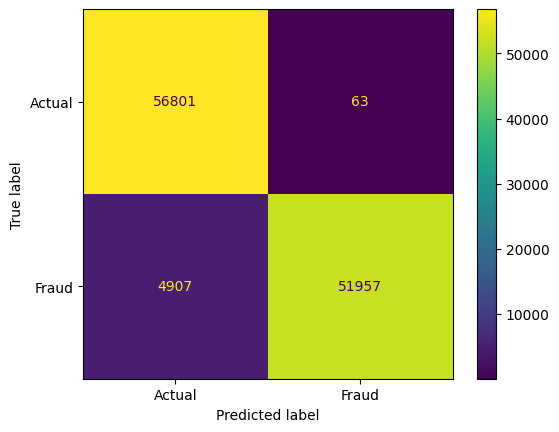

In [ ]:
score=recall_score(Ytest_re,xgb_typred)
matr=confusion_matrix(Ytest_re,xgb_typred)
print(matr)

label=['Actual','Fraud']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()

.

.

.

## **Conclusion**

Five models were tested, out of which **SVM(92%)** and **XGBoost(91%)** have a good Recall Score. Hence these two models can be considered for Credit Card Fraud Detection.

